In [87]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [88]:
tf.random.set_seed(3)

In [89]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [90]:
X_train.shape, Y_train.shape

((60000, 28, 28), (60000,))

In [91]:
X_test.shape, Y_test.shape

((10000, 28, 28), (10000,))

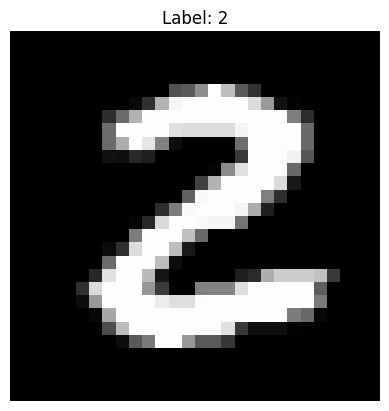

In [92]:
plt.imshow(X_train[25], cmap='gray')
plt.title(f"Label: {Y_train[25]}")
plt.axis('off')
plt.show()

In [93]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [94]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [95]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [96]:
history = model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8608 - loss: 0.5018
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9554 - loss: 0.1486
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9676 - loss: 0.1074
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9743 - loss: 0.0845
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9797 - loss: 0.0690
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9829 - loss: 0.0581
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9849 - loss: 0.0499
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9881 - loss: 0.0427
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9882 - loss: 0.0381
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9904 - loss: 0.0319


In [97]:
loss, accuracy = model.evaluate(X_test, Y_test)
print("Test Accuracy:", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9652 - loss: 0.1271
Test Accuracy: 0.9682999849319458


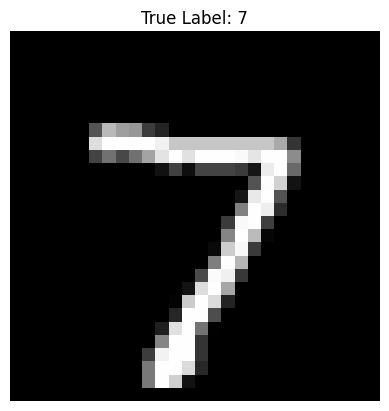

In [98]:
plt.imshow(X_test[0], cmap='gray')
plt.title(f"True Label: {Y_test[0]}")
plt.axis('off')
plt.show()

In [99]:
Y_pred = model.predict(X_test)
print("Raw prediction output:", Y_pred[0])
predicted_label = np.argmax(Y_pred[0])
print("Predicted Label for first image:", predicted_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Raw prediction output: [3.9696498e-03 4.1405280e-04 3.4112789e-02 9.9735355e-01 7.4503554e-09
 1.2946235e-04 4.6205353e-10 9.9999458e-01 3.0261258e-02 1.4163117e-01]
Predicted Label for first image: 7


In [100]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]

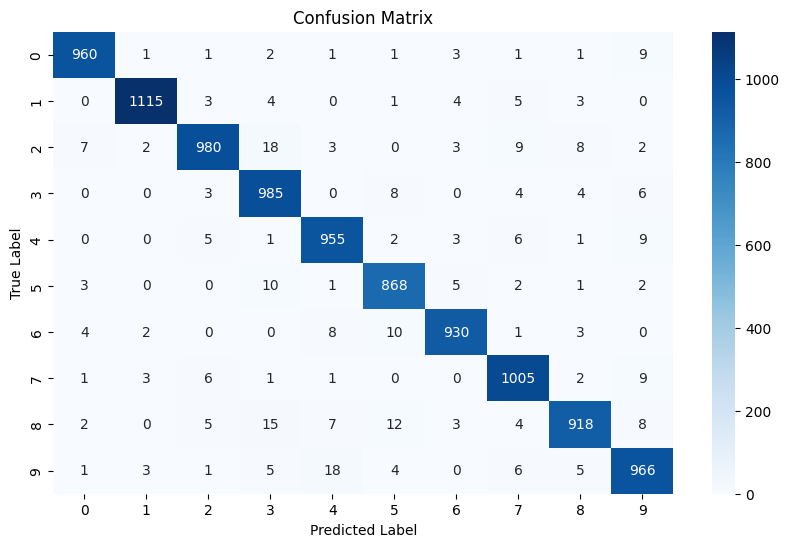

In [101]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
plt.figure(figsize=(10, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [102]:
image_path = '/content/5.png'

In [103]:
image = cv2.imread(image_path)
cv2_imshow(image)

In [104]:
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

In [105]:
resized = cv2.resize(gray, (28, 28))

In [106]:
resized = resized / 255.0
reshaped_image = np.reshape(resized, (1, 28, 28))

In [107]:
custom_prediction = model.predict(reshaped_image)
custom_label = np.argmax(custom_prediction)
print("The Handwritten Digit is recognized as:", custom_label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The Handwritten Digit is recognized as: 5


In [108]:
user_path = input("Enter path of your image: ")
user_image = cv2.imread(user_path)
cv2_imshow(user_image)

gray = cv2.cvtColor(user_image, cv2.COLOR_RGB2GRAY)
resized = cv2.resize(gray, (28, 28))
resized = resized / 255.0
reshaped = np.reshape(resized, (1, 28, 28))

prediction = model.predict(reshaped)
predicted_label = np.argmax(prediction)
print("The Handwritten Digit is recognized as:", predicted_label)

Enter path of your image: /content/4.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
The Handwritten Digit is recognized as: 4
